# Problem Statement
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

-- Output: Number of predicted wins (W)

# 1. import required important libraries

In [76]:
#Analysing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore,boxcox

#machine learning libraries

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#import warnings for ignore warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
#fetching the dataset

df = pd.read_csv("baseball.csv")
df.head()
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

obs :- Linear regression model have to use in the dataset 

# 2. Description of dataset

Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

   Input features:
    R  - Runs
    AB - At Bats
    H  - Hits
    2B - Doubles
    3B - Triples
    HR - Homeruns
    BB - Walks
    SO - Strikeouts
    SB - Stolen Bases
    RA - Run Allowed
    ER - Earned Runs
    ERA - Earned Run Average (ERA)
    CG - Complete games ( referred online)
    SHO - Shutouts
    SV - Saves
    E - Errors
  ----------------------------------------------------  
 Output features:
    W -Number of predicted wins (W)

In [3]:
# let's see the size of the dataset

df.shape

(30, 17)

observation = there are 30 rows and 17 columns in given dataset

In [4]:
#let"s see the types of given data

df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

observation = here , we can see the all value is numerical so we don't have to use label encoder

            = 16 integer and 1 float variable present in dataet .
            
            = not any categorical value are present in dataset

In [5]:
#checking any null values in dataset 

df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

observation = not any null values

# 3. Heatmap

<AxesSubplot:>

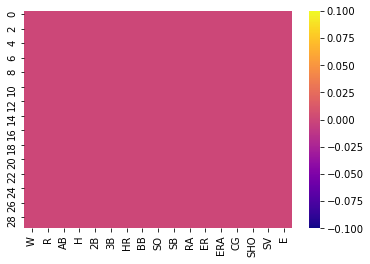

In [6]:
sns.heatmap(df.isnull(),cmap='plasma')

observation  = Here  we are using visualizing data plot to recheck the null values with the heatmap..

conclusion = output is showing the same colour it means that there is not null values

# 4. EDA

In [7]:
#statical summary

df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


observation = Here we can see . it has some of columns having outliers and skewness .. and we will get the data 

W        AxesSubplot(0.125,0.536818;0.133621x0.343182)
R     AxesSubplot(0.285345,0.536818;0.133621x0.343182)
AB     AxesSubplot(0.44569,0.536818;0.133621x0.343182)
H     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
2B    AxesSubplot(0.766379,0.536818;0.133621x0.343182)
3B          AxesSubplot(0.125,0.125;0.133621x0.343182)
HR       AxesSubplot(0.285345,0.125;0.133621x0.343182)
BB        AxesSubplot(0.44569,0.125;0.133621x0.343182)
SO       AxesSubplot(0.606034,0.125;0.133621x0.343182)
SB       AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

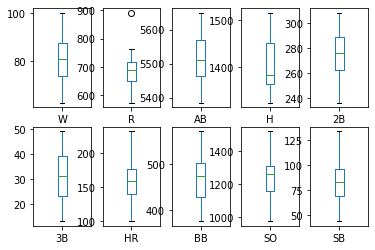

In [8]:
df.iloc[:,0:10].plot(kind='box',subplots=True,layout=(2,5))

RA        AxesSubplot(0.125,0.536818;0.133621x0.343182)
ER     AxesSubplot(0.285345,0.536818;0.133621x0.343182)
ERA     AxesSubplot(0.44569,0.536818;0.133621x0.343182)
CG     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
SHO    AxesSubplot(0.766379,0.536818;0.133621x0.343182)
SV           AxesSubplot(0.125,0.125;0.133621x0.343182)
E         AxesSubplot(0.285345,0.125;0.133621x0.343182)
dtype: object

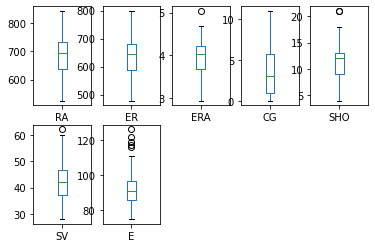

In [9]:
df.iloc[:,10:].plot(kind='box',subplots=True,layout=(2,5))

observation = columns have outliers R, ERA ,SHO ,SV , E

        =some of the columns are very near to whisker SV,ERA ,SHO

        = Rest of the don't have outliers

# 5. urivariant Analysis

<AxesSubplot:>

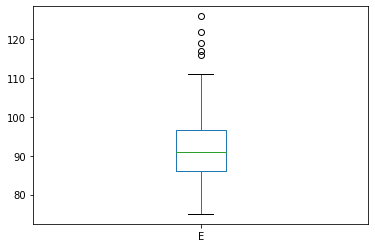

In [10]:
df['E'].plot(kind='box')

<AxesSubplot:>

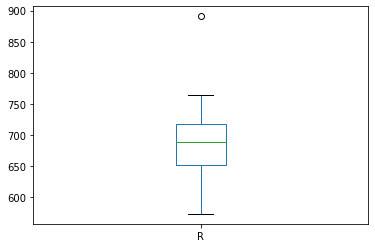

In [11]:
df['R'].plot(kind='box')

In [12]:
#checking the skewness

df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

observation - we are getting that there is some skewness which is present in  R, H, CG, SHO, SV, E

              now, we will handle this skewness
    
              let's check the distribution plot for more details

<Figure size 432x288 with 0 Axes>

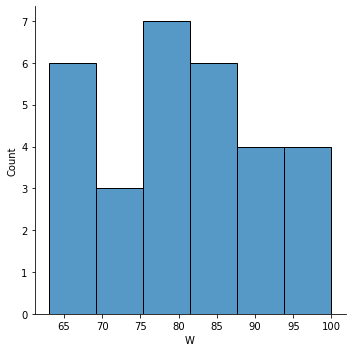

<Figure size 432x288 with 0 Axes>

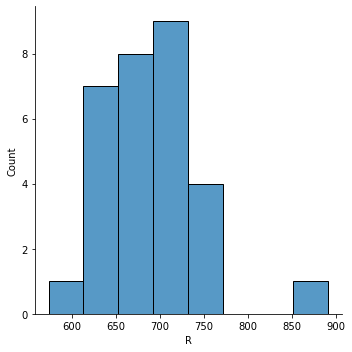

<Figure size 432x288 with 0 Axes>

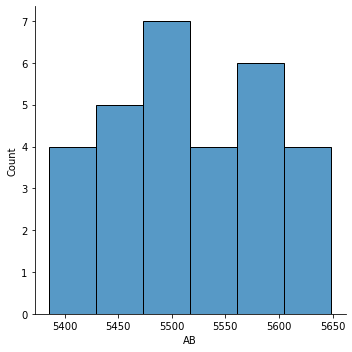

<Figure size 432x288 with 0 Axes>

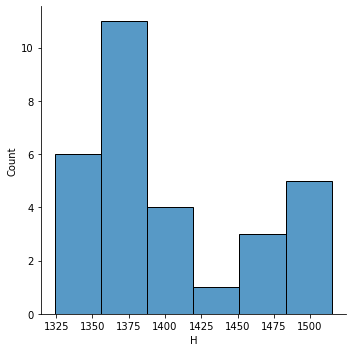

<Figure size 432x288 with 0 Axes>

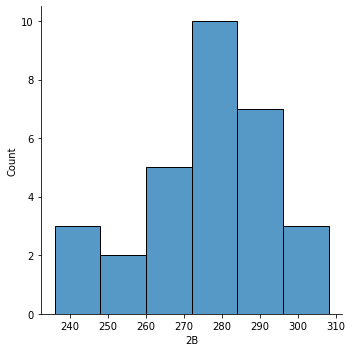

<Figure size 432x288 with 0 Axes>

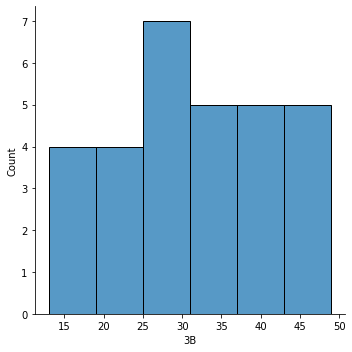

<Figure size 432x288 with 0 Axes>

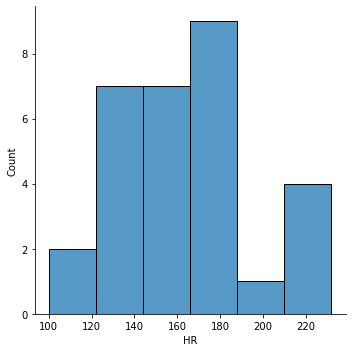

<Figure size 432x288 with 0 Axes>

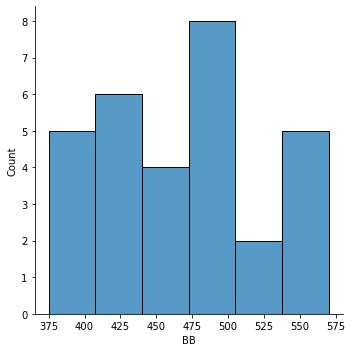

<Figure size 432x288 with 0 Axes>

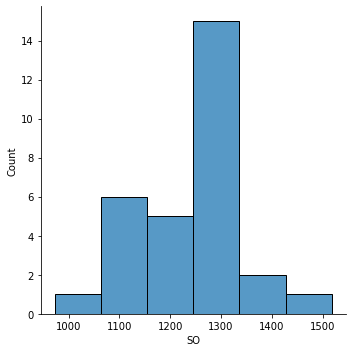

<Figure size 432x288 with 0 Axes>

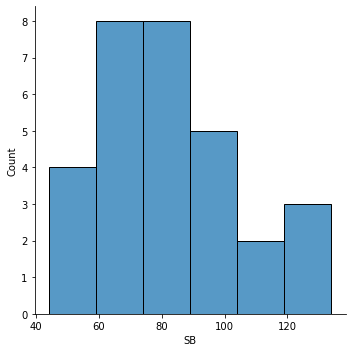

<Figure size 432x288 with 0 Axes>

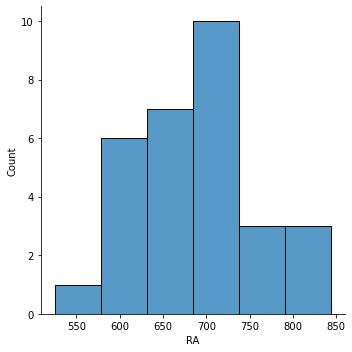

<Figure size 432x288 with 0 Axes>

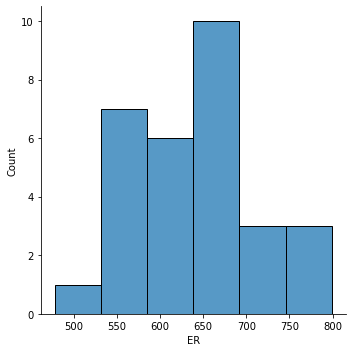

<Figure size 432x288 with 0 Axes>

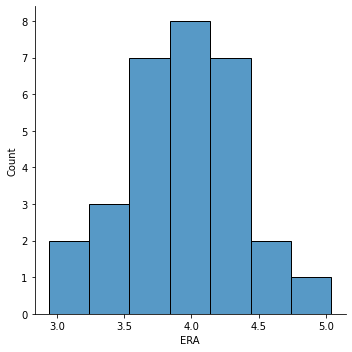

<Figure size 432x288 with 0 Axes>

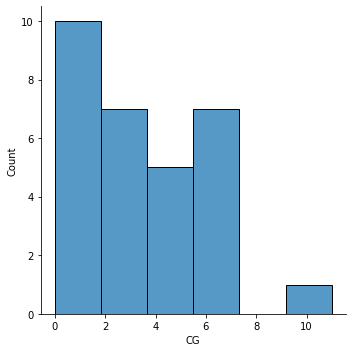

<Figure size 432x288 with 0 Axes>

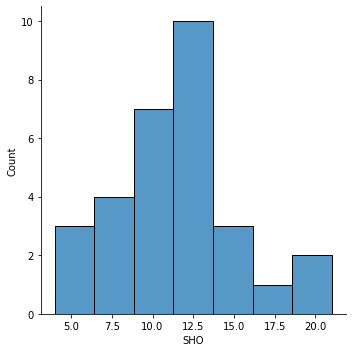

<Figure size 432x288 with 0 Axes>

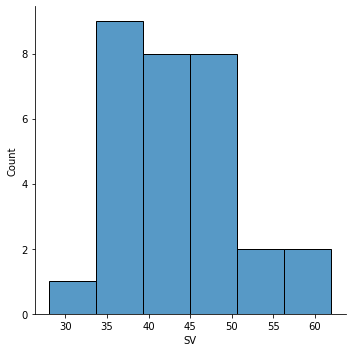

<Figure size 432x288 with 0 Axes>

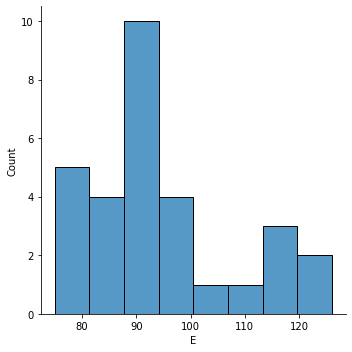

In [13]:
# let's distribute the data

for i in df.columns:
    plt.figure()
    sns.displot(df[i])

observation - As some plots H, HR, SO, CG, SHO, E all of this are having some skewness

# 6. Checking the Correlation of data

<AxesSubplot:>

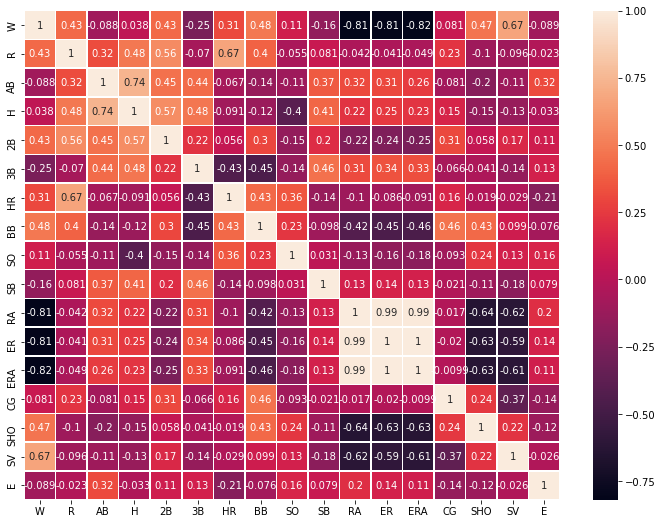

In [14]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),linewidth=0.5,annot=True)

observation - R, ER, ERA, has highly neagative correlated with target values

# 7. Bivariant Analysis

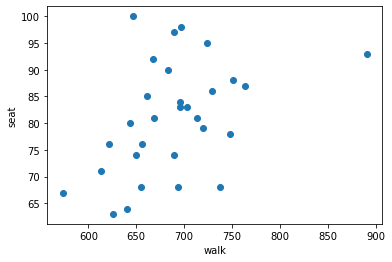

In [15]:
plt.scatter(df.R,df.W)
plt.xlabel("walk")
plt.ylabel("seat")
plt.show()

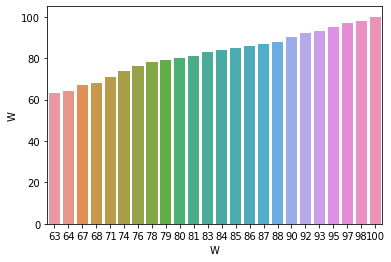

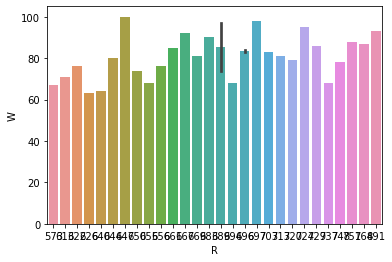

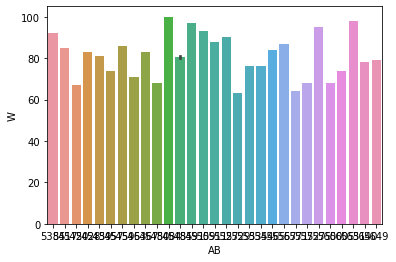

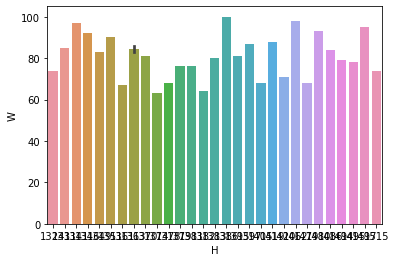

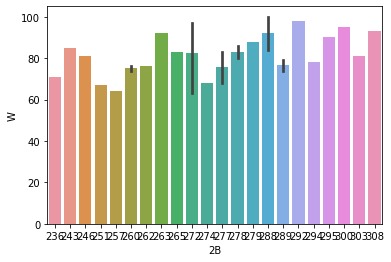

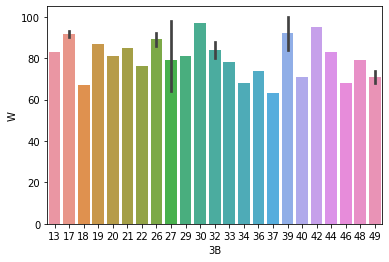

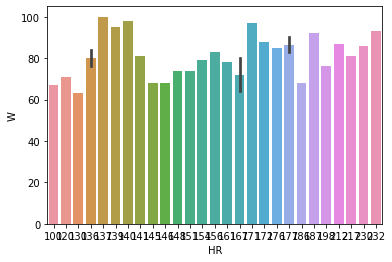

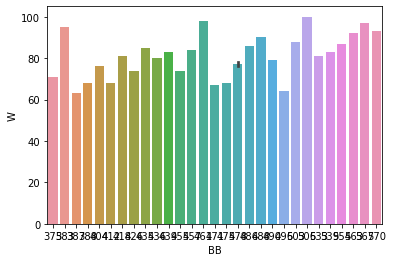

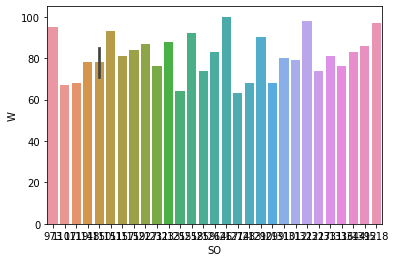

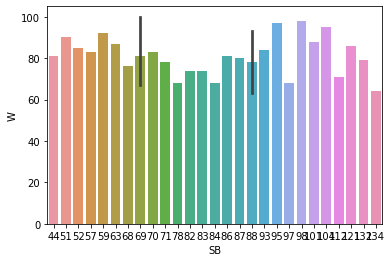

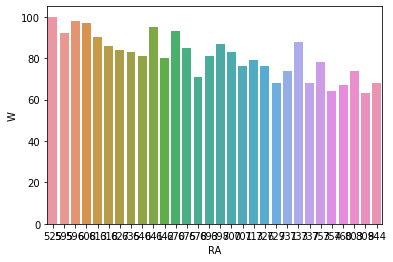

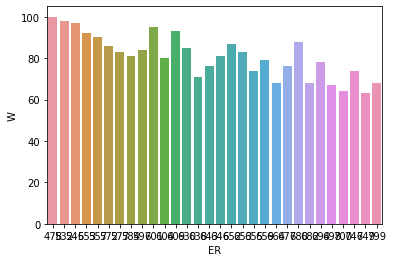

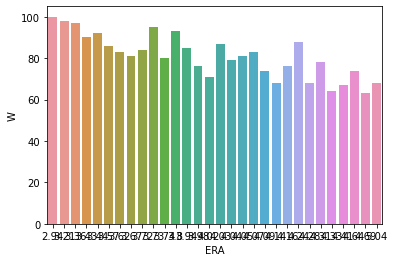

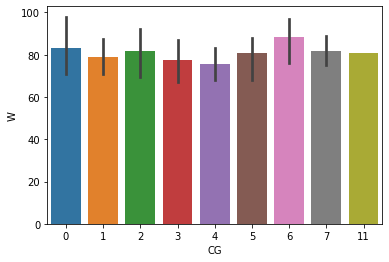

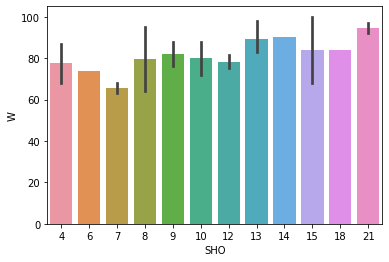

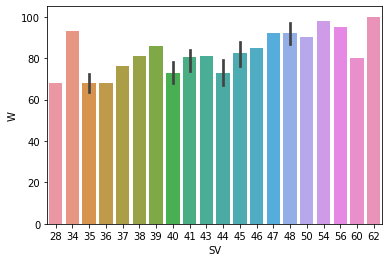

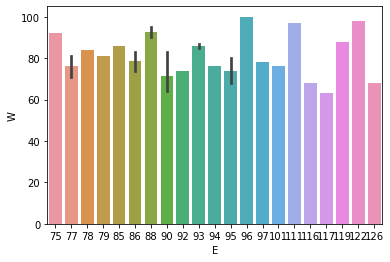

In [16]:
#let's start relation with dataset

for i in df.columns:
    plt.figure()
    sns.barplot(x=df[i],y=df.W)
    

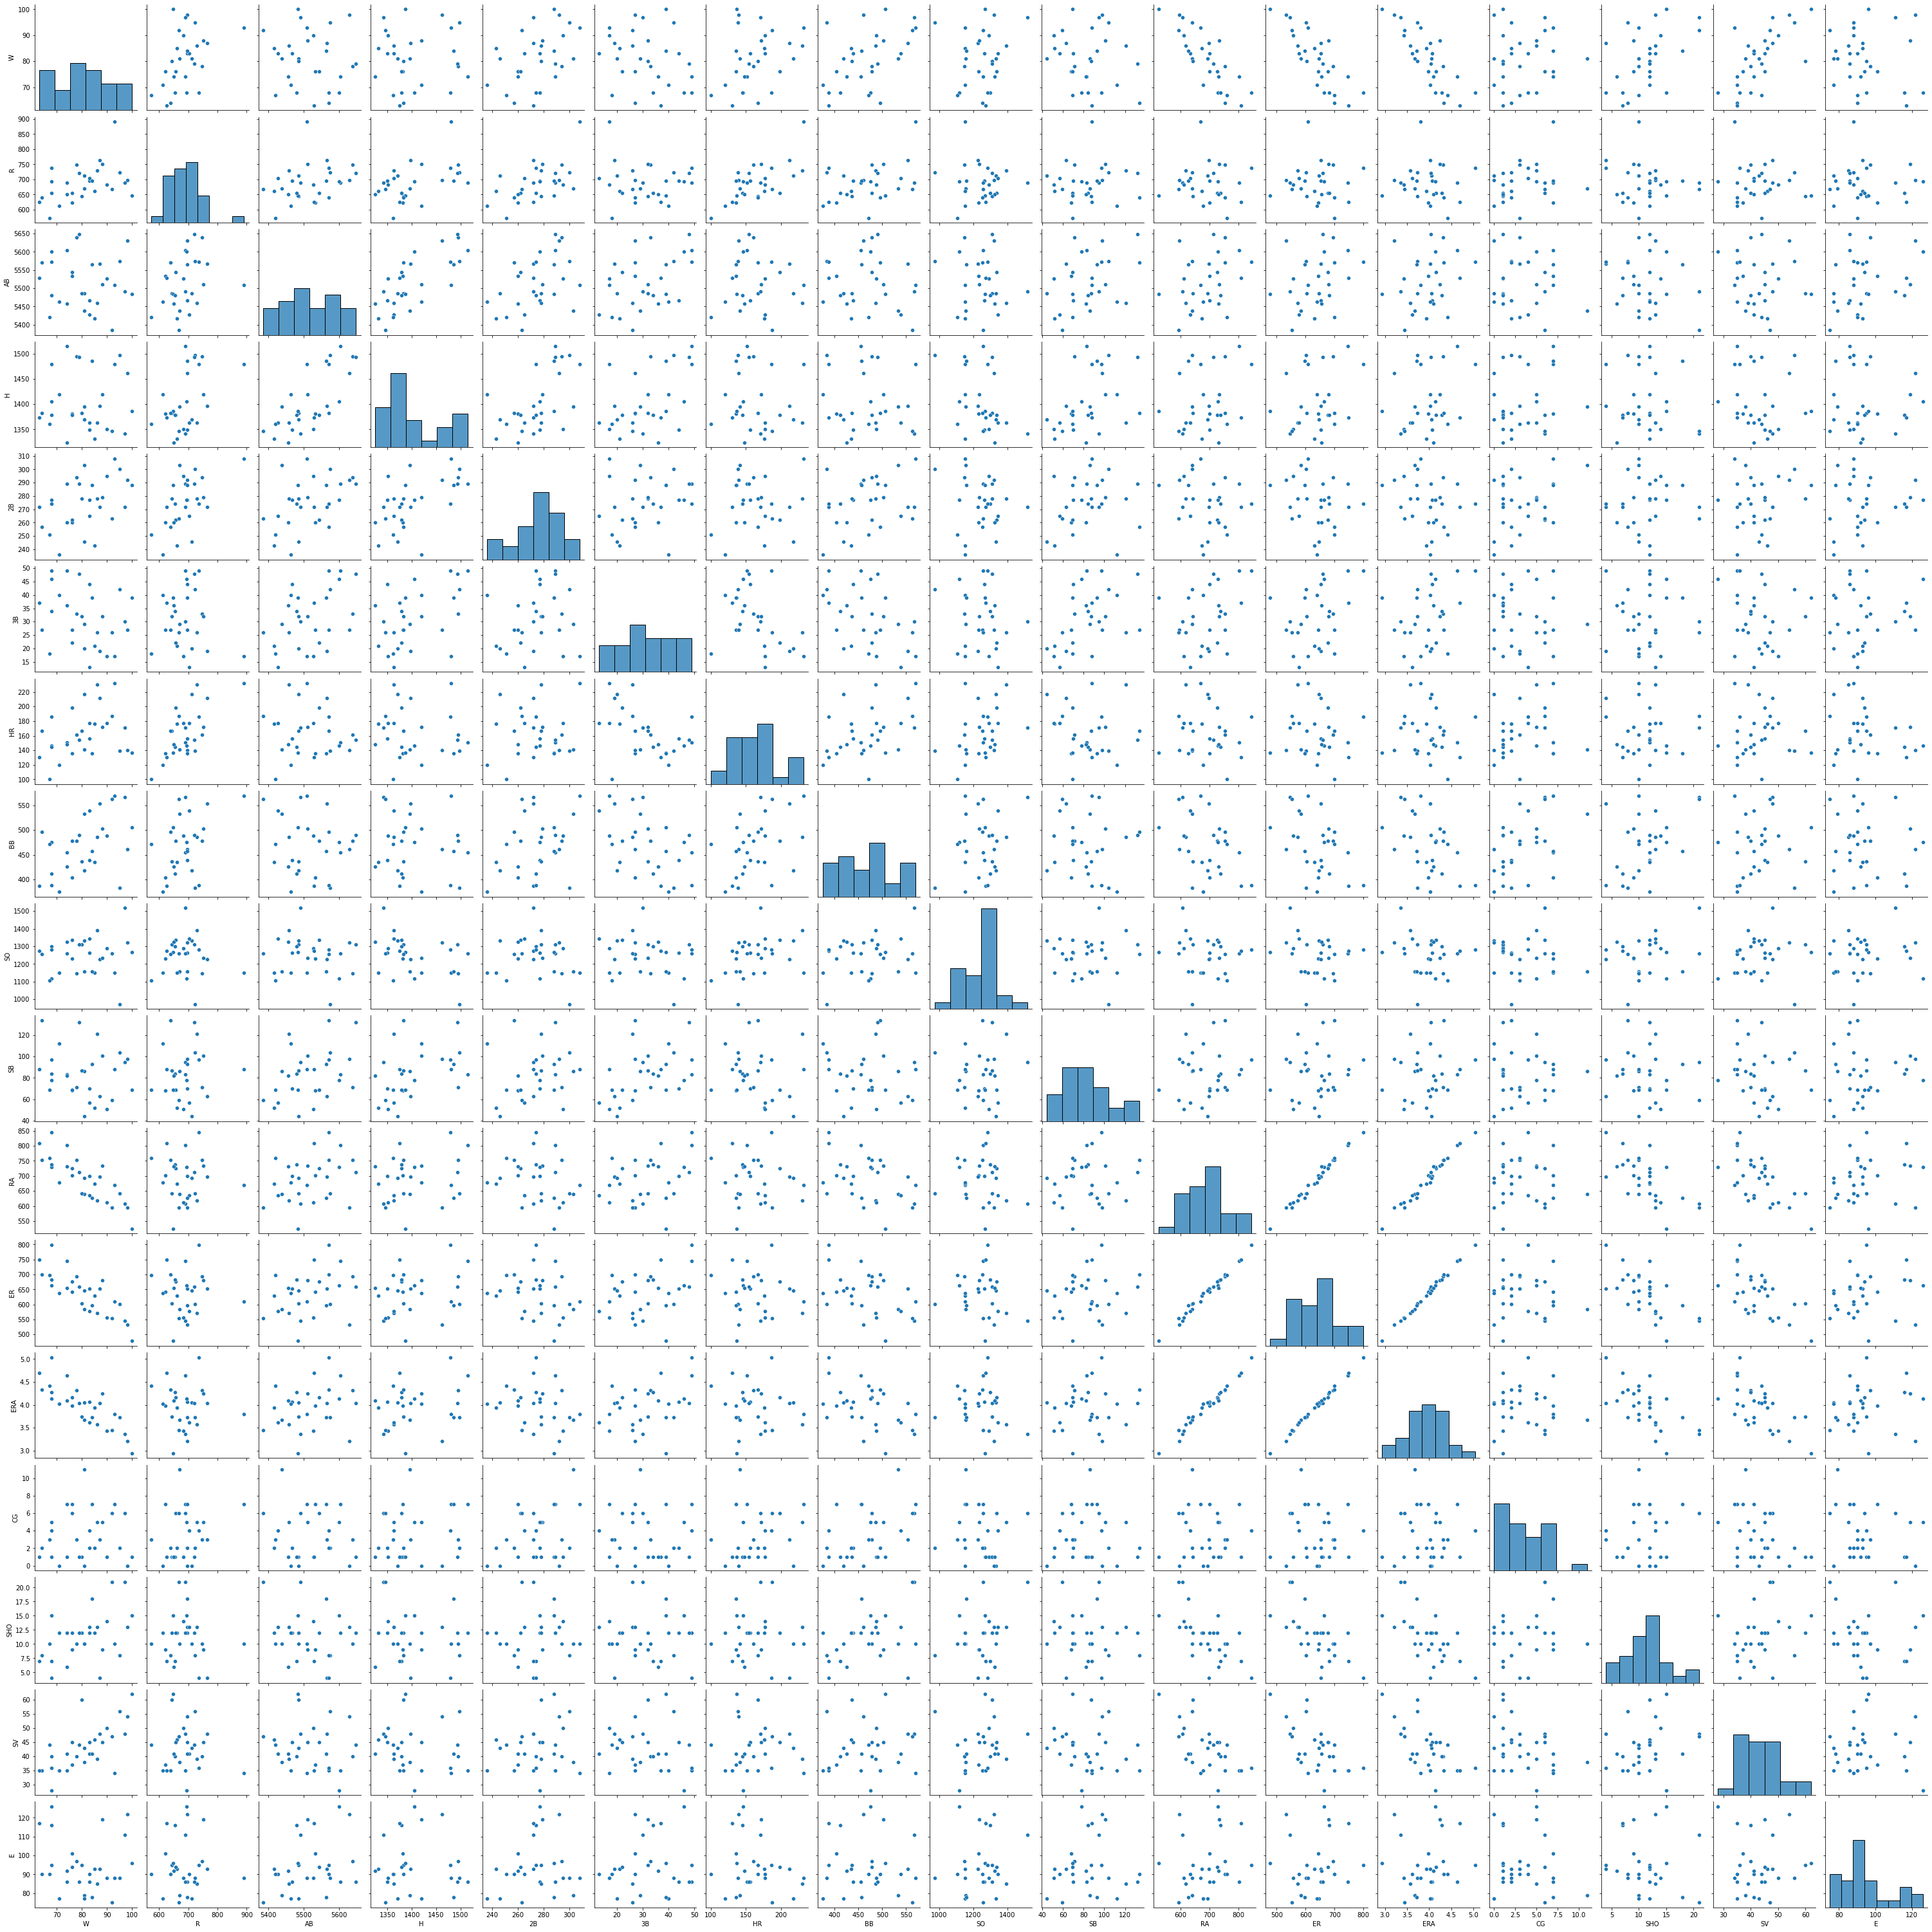

In [87]:
sns.pairplot(df)

now we are observing relationship between target variable and feature

# 8. Removing outlier from Data

In [17]:
z=np.abs(zscore(df))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [19]:
# now we creating new dataframe

df_new = df[(z<3).all(axis=1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


let's compare the new dataframe and new dataframe

In [22]:
# old dataframe set shape

df.shape

(30, 17)

In [23]:
# new dataframe set shape

df_new.shape

(29, 17)

In [24]:
# data loss

(30-29)/30*100

3.3333333333333335

# 9. removing highly negative correlated columns

In [25]:
df_new.drop(['RA','ER'],axis=1,inplace=True)

In [26]:
df_new.drop('ERA',axis=1,inplace=True)

# 10. spliting X and Y Data

In [27]:
x = df_new.iloc[:,1:-1]
y = df_new['W']

In [28]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV
0,724,5575,1497,300,42,139,383,973,104,2,8,56
1,696,5467,1349,277,44,156,439,1264,70,2,12,45
2,669,5439,1395,303,29,141,533,1157,86,11,10,38
3,622,5533,1381,260,27,136,404,1231,68,7,9,37
4,689,5605,1515,289,49,151,455,1259,83,7,12,35
6,764,5567,1397,272,19,212,554,1227,63,3,4,48
7,713,5485,1370,246,20,217,418,1331,44,0,10,43
8,644,5485,1383,278,32,167,436,1310,87,1,12,60
9,748,5640,1495,294,33,161,478,1148,71,3,10,40
10,751,5511,1419,279,32,172,503,1233,101,5,9,45


In [29]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

# 11. Removing skewness

In [30]:
df_x = power_transform(x)

df_x = pd.DataFrame(df_x)

In [31]:
x = df_x
x

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.962544,0.0,0.0,1.685188,1.006150,-0.741927,-1.605198,-2.550612,0.936132,-0.307098,-0.787002,1.532753
1,0.298863,0.0,0.0,0.138198,1.185227,-0.109958,-0.462096,0.093683,-0.516377,-0.307098,0.236737,0.312020
2,-0.312105,0.0,0.0,1.907385,-0.228819,-0.664354,1.232098,-0.935611,0.225038,2.011315,-0.252844,-0.664137
3,-1.308298,0.0,0.0,-0.837665,-0.432228,-0.860039,-1.162721,-0.230683,-0.618422,1.264463,-0.513555,-0.820689
4,0.137737,0.0,0.0,0.911435,1.622636,-0.289647,-0.155686,0.044143,0.095038,1.264463,0.236737,-1.149165
5,1.964209,0.0,0.0,-0.163010,-1.295827,1.631637,1.579494,-0.269583,-0.884526,0.121871,-2.064039,0.677176
6,0.698146,0.0,0.0,-1.542635,-1.182758,1.767734,-0.877217,0.770980,-2.082843,-1.732896,-0.252844,0.052325
7,-0.852595,0.0,0.0,0.199897,0.068703,0.269125,-0.520476,0.556008,0.267558,-0.870682,0.236737,1.908137
8,1.555951,0.0,0.0,1.255256,0.166017,0.065014,0.270944,-1.019210,-0.466233,0.121871,-0.252844,-0.365006
9,1.631727,0.0,0.0,0.262086,0.068703,0.434620,0.717576,-0.211199,0.824915,0.770649,-0.513555,0.312020


# 12. standard scaling

In [32]:
scalar = StandardScaler()
x = scalar.fit_transform(x)

# 13. Finding best random state

In [33]:
maxscore = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"best random state :{i} and Train r2 score:{r2_score(y_train,pred_train)}")
    print(f"best random state :{i} and Train r2 score:{r2_score(y_test,pred_test)}")
    print("")
    

best random state :1 and Train r2 score:0.8462466837166794
best random state :1 and Train r2 score:0.6456357341662944

best random state :2 and Train r2 score:0.8483440654099446
best random state :2 and Train r2 score:-1.2104730680582407

best random state :3 and Train r2 score:0.830955666782217
best random state :3 and Train r2 score:0.7503960455475243

best random state :4 and Train r2 score:0.8611092878259163
best random state :4 and Train r2 score:0.4528149534839764

best random state :5 and Train r2 score:0.8732913574197616
best random state :5 and Train r2 score:0.2106085861373853

best random state :6 and Train r2 score:0.848214997046354
best random state :6 and Train r2 score:0.6825593630415402

best random state :7 and Train r2 score:0.8601194177218725
best random state :7 and Train r2 score:0.1886987477778368

best random state :8 and Train r2 score:0.8443006244910076
best random state :8 and Train r2 score:0.7613264058156872

best random state :9 and Train r2 score:0.9006191

# best random state :23 and Train r2 score:0.8247644310583757

# best random state :23 and Train r2 score:0.7358346939261378

In [34]:
# splitting test and training data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state=23)

# 14. LinearRegression

In [36]:
lr = LinearRegression()
lr.fit(x_train,y_train)
prec = lr.predict(x_test)

In [59]:
# performance of model

def performance(actual,prec):
    print("error")
    print("mean absolute error",mean_absolute_error(actual,prec))
    print("mean square error",mean_squared_error(actual,prec))
    print("R2 score :",r2_score(actual,prec))

In [60]:
performance(y_test,prec)

error
mean absolute error 4.9052123834641845
mean square error 36.60099160443846
R2 score : 0.7604105123679072


# 15. Cross validation

In [40]:
# importing libraries for cross validation
from sklearn.model_selection import cross_val_score

In [41]:
cross_ls = cross_val_score(LinearRegression(),x,y,cv = 10)
cross_ls.mean()

-5.944004960197791

# 16. Regularation process

In [42]:
# importing library for regularation process

from sklearn.linear_model import Lasso,Ridge,ElasticNet

# with the help of alpha value we can correct value

le = Lasso(alpha=0.0001)
le.fit(x_train,y_train)
predict = le.predict(x_test)
le.score(x_train,y_train)

0.8137232694267853

# 17. Cross validation

In [44]:
cross_valid = cross_val_score(le,x,y,cv = 10)
cross_valid.mean()

-5.943691740647563

In [46]:
# ridge model
rg = Ridge(alpha=0.0001)
rg.fit(x_train,y_train)
rg.score(x_train,y_train)

0.8137232776132801

In [48]:
cross_valid = cross_val_score(rg,x,y,cv=10)
cross_valid.mean()

-5.943965765736465

In [50]:
# elastic model of rg
el = ElasticNet(alpha=0.0001)
el.fit(x_train,y_train)
el.score(x_train,y_train)

0.8137232507356762

In [51]:
cross_valid = cross_val_score(el,x,y,cv=10)
cross_valid.mean()

-5.943337716598091

# 18. model(some other model to handle dataset)

In [55]:
# importing library

from sklearn.svm import SVR

In [61]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

for i  in kernel:
    sr = SVR(kernel = i)
    sr.fit(x_train,y_train)
    print(sr.score(x_train,y_train))
    prec = sr.predict(x_test)
    print("error")
    print("mean absolute error",mean_absolute_error(y_test,prec))
    print("mean square error",mean_squared_error(y_test,prec))
    cross_val = cross_val_score(sr,x,y,cv=10)
    print("cross validation",cross_val.mean())
    print("")

0.635853774290406
error
mean absolute error 4.9052123834641845
mean square error 36.60099160443846
cross validation -7.0218123271962245

0.3895161851925394
error
mean absolute error 9.851454594487656
mean square error 140.93521519982315
cross validation -5.847696092613175

0.19200226673928955
error
mean absolute error 9.691732263925418
mean square error 138.04056011158093
cross validation -6.54114430244923

0.2900438840905164
error
mean absolute error 8.554165172205888
mean square error 117.30892833172064
cross validation -4.160333456071724



# 19. Hyper parameter Tuning

In [66]:
# importing libraries

from sklearn.model_selection import GridSearchCV

In [72]:
# lasso Regression parameter

parameter = {'alpha':[0.1,0.01,0.001,0.0001],
            'selection':['cyclic','random']}

In [73]:
lasso_hp = GridSearchCV(Lasso(),parameter,cv=5)
lasso_hp.fit(x_train,y_train)
lasso_hp.best_params_

{'alpha': 0.1, 'selection': 'random'}

In [75]:
#with the help of alpha it will be coreect

le = Lasso(alpha = 0.1,selection='random')
le.fit(x_train,y_train)
predict = le.predict(x_test)
le.score(x_train,y_train)

print(r2_score(y_test,predict))

0.8264506408202889


In [79]:
# ridge regression parameters

param_r = {'alpha':[0.1,0.01,0.001,0.0001],
          'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}

In [82]:
ridge_hp = GridSearchCV(Ridge(),param_r,cv=5)
ridge_hp.fit(x_train,y_train)
ridge_hp.best_params_

{'alpha': 0.1, 'solver': 'saga'}

In [83]:
# Ridge model

rg = Ridge(alpha = 0.1,solver = 'saga')
rg.fit(x_train,y_train)
rg.score(x_train,y_train)
predict = rg.predict(x_test)

print(r2_score(y_test,predict))

0.8160645377370521


 observation = now we can see the Lasso regression is giving higher accuracy, so now we are selecting the model

# 20. Saving model

In [84]:
# importing saving libraries

import joblib

In [85]:
joblib.dump(le,"Base_ball_wins_predication.obj")

['Base_ball_wins_predication.obj']

In [86]:
# loading the model to file

jl = joblib.load("Base_ball_wins_predication.obj")
jl

Lasso(alpha=0.1, selection='random')